In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
#Importar el Data Set
dataSet = pd.read_csv("Position_Salaries.csv")
X = dataSet.iloc[:, 1:2]
y = dataSet.iloc[:, 2]

In [11]:
type(dataSet)

pandas.core.frame.DataFrame

In [4]:
dataSet

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [7]:
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [8]:
X

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [13]:
X.shape

(10, 1)

In [15]:
X.ndim

2

In [17]:
X.size

10

In [10]:
print(y)

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64


In [14]:
y.shape

(10,)

In [16]:
y.ndim

1

In [18]:
y.size

10

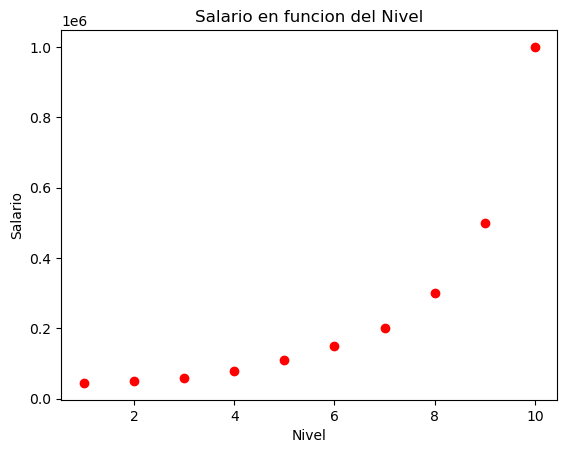

In [19]:
plt.scatter(X, y, color = "red")
plt.title("Salario en funcion del Nivel")
plt.xlabel("Nivel")
plt.ylabel("Salario")
plt.show()

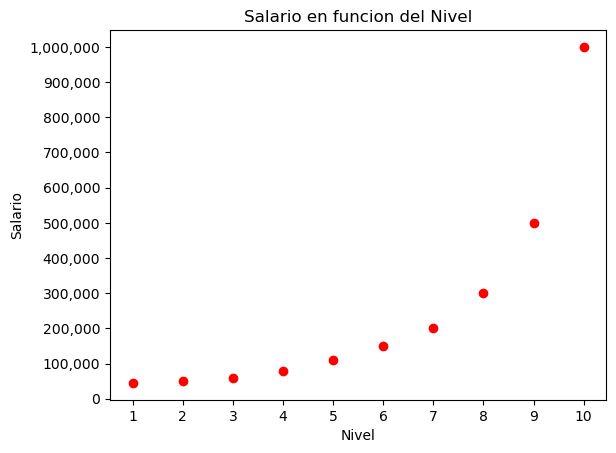

In [36]:
#Formatear los Salarios para que no se expresen en Notacion Cientifica
from matplotlib.ticker import FuncFormatter, MultipleLocator

#Funcion para formatear numeros con comas
def format_with_comma(x, pos):
    return f"{int(x):,}"

#Graficar
plt.scatter(X, y, color = "red")
plt.title("Salario en funcion del Nivel")
plt.xlabel("Nivel")
plt.ylabel("Salario")

#Aplicar el formato al eje y
formatter = FuncFormatter(format_with_comma)
plt.gca().yaxis.set_major_formatter(formatter)

# Definir intervalos de 100,000 en eje y
plt.gca().yaxis.set_major_locator(MultipleLocator(100000))

# Intervalos del eje X de 1 en 1
plt.gca().xaxis.set_major_locator(MultipleLocator(1))

plt.show()

In [22]:
#Ajustar la regresión con el Data Set
from sklearn.svm import SVR
regression = SVR(kernel = "rbf")
regression.fit(X,y)

SVR()

In [23]:
regression.support_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [24]:
regression.support_vectors_

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]])

In [29]:
regression.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [32]:
#Prediccion de nuestros modelos SVR
y_pred = regression.predict(pd.DataFrame([[6.5]], columns = X.columns))
#Se le pasa un DataFrame con el mismo nombre de columna 

In [33]:
y_pred

array([130001.82883924])

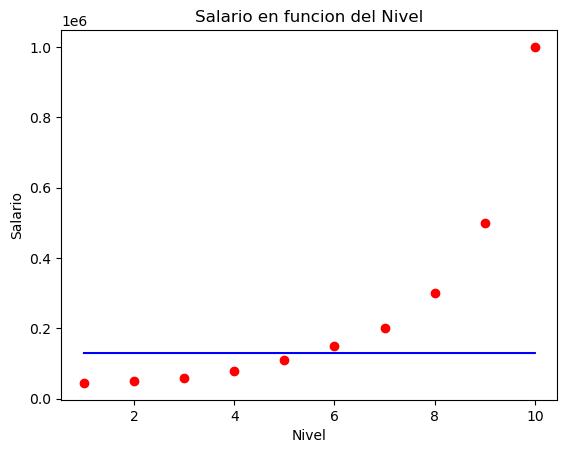

In [39]:
#Visualizar los resultados del SVR
plt.scatter(X, y, color = "red")
plt.plot(X, regression.predict(X), color = "blue")
plt.title("Salario en funcion del Nivel")
plt.xlabel("Nivel")
plt.ylabel("Salario")
plt.show()

In [44]:
#Escalar variables
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.values.reshape(-1,1))

In [48]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [49]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [55]:
type(X)

numpy.ndarray

In [56]:
type(y)

numpy.ndarray

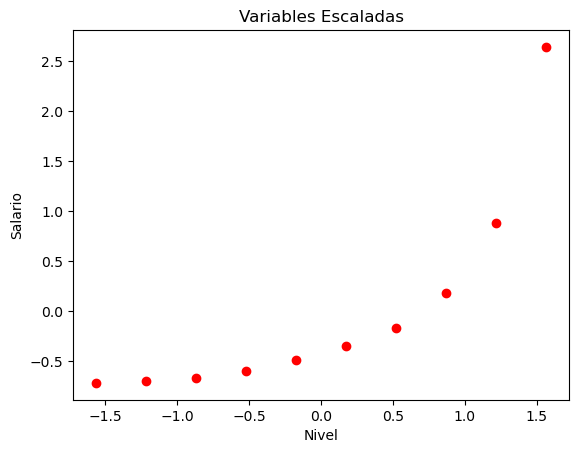

In [50]:
#Visualizar los datos Originales habiendo escalado "X" y "y"
plt.scatter(X, y, color = "red")
plt.title("Variables Escaladas")
plt.xlabel("Nivel")
plt.ylabel("Salario")
plt.show()

In [52]:
#Ajustar la regresión con el Data Set escalado
from sklearn.svm import SVR
regression = SVR(kernel = "rbf")
regression.fit(X,y.ravel())

SVR()

In [62]:
#Prediccion de nuestro modelo usando SVR
y_pred = sc_y.inverse_transform(regression.predict(sc_X.transform([[6.5]])).reshape(-1,1))

In [63]:
y_pred

array([[252789.13921624]])

In [58]:
# Escalar el valor 6.5 usando sc_X
X_test_scaled = sc_X.transform(np.array([[6.5]]))

# Predecir con SVR
y_pred_scaled = regression.predict(X_test_scaled)

# Desescalar el resultado para obtener el valor original
y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1,1))

In [59]:
y_pred

array([[252789.13921624]])

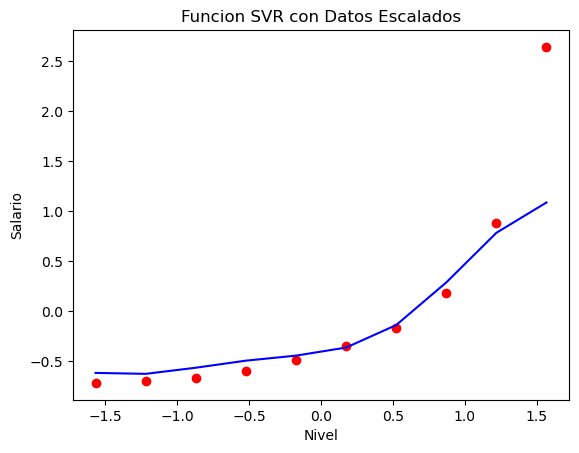

In [60]:
#Visualizar 
plt.scatter(X, y, color = "red")
plt.plot(X, regression.predict(X), color = "blue")
plt.title("Funcion SVR con Datos Escalados")
plt.xlabel("Nivel")
plt.ylabel("Salario")
plt.show()

In [ ]:
#tomar en cuenta que el curso de ML borra todo el progreso
#e inicia de nuevo; por eso su y_pred es muy distinto al mio